# Домашнє завдання № 2

## Частина третя: Аналіз датасет з Kaggle.com

In [898]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### 3.1. Прочитайте csv файл (використовуйте функцію read_csv)

In [899]:
df = pd.read_csv("bestsellers with categories.csv")

#### 3.2. Виведіть перші п'ять рядків (використовується функція head)

In [900]:
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


#### 3.3. Виведіть розміри датасету (використовуйте атрибут shape)

In [901]:
print(df.shape)

(550, 7)


#### 3.3. Про скільки книг зберігає дані датасет? Відповідь: 550

#### 3.4. Зміна назв колонок

In [902]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

#### 3.5. Первинне дослідження даних

#### 3.5.1. Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [903]:
# проаналізуємо весь df на предмет відсутніх даних в комірках
nan_value = df.isna()
print(nan_value)

      name  author  user_rating  reviews  price   year  genre
0    False   False        False    False  False  False  False
1    False   False        False    False  False  False  False
2    False   False        False    False  False  False  False
3    False   False        False    False  False  False  False
4    False   False        False    False  False  False  False
..     ...     ...          ...      ...    ...    ...    ...
545  False   False        False    False  False  False  False
546  False   False        False    False  False  False  False
547  False   False        False    False  False  False  False
548  False   False        False    False  False  False  False
549  False   False        False    False  False  False  False

[550 rows x 7 columns]


In [904]:
# підрахуємо кількість порожніх комірок по всьому df
count_nan = nan_value.sum()
print(count_nan)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


#### 3.5.2. Чи є в якихось змінних пропуски? Відповідь: Ні

#### 3.5.3. Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [905]:
print(df.genre.unique())

['Non Fiction' 'Fiction']


#### 3.5.4. Які є унікальні жанри? Відповідь: 'Non Fiction', 'Fiction'

#### 3.5.5. Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

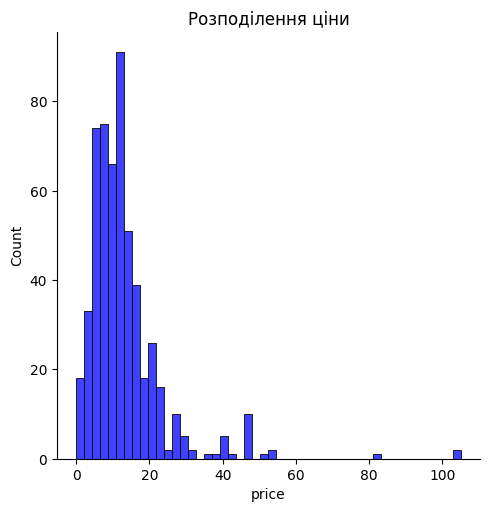

In [906]:
sns.displot(df['price'], kde=False, color='blue')
plt.title('Розподілення ціни')
plt.show()

#### 3.5.6. Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [907]:
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

105
0
13.1
11.0


#### 3.5.7. Максимальна ціна? Відповідь: 105

#### 3.5.8. Мінімальна ціна? Відповідь: 0

#### 3.5.9. Середня ціна? Відповідь: 13.1

#### 3.5.10. Медіанна ціна? Відповідь: 11.0

#### 3.6. Пошук та сортування даних

#### 3.6.1. Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [908]:
df['user_rating'].max()

4.9

#### 3.6.2. Скільки книг мають такий рейтинг? Відповідь: 52

In [909]:
len(df[df['user_rating']==4.9])

52

#### 3.6.3. Яка книга має найбільше відгуків? Відповідь: 'Where the Crawdads Sing'

In [910]:
df[df['reviews']==df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


#### 3.6.4. З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: 'Publication Manual of the American Psychological Association, 6th Edition'

In [911]:
# сгрупуємо книги по 2015 року
df_2015 = df[df['year']==2015]
# відсортуємо книги за рейтингом
df_2015_sort = df_2015.sort_values(by='user_rating', ascending=False)
# знайдемо 50 найпопулярніших книг
df_2015_sort_50 = df_2015_sort[:50]
# знайдемо найдорожчу з 50 найпопулярніших книг
most_expensive_book = df_2015_sort_50.loc[df_2015_sort_50['price'] == df_2015_sort_50['price'].max()]
print(most_expensive_book)

                                                  name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  


#### 3.6.5. Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [912]:
df_2010 = df[(df['year']==2010) & (df['genre']=='Fiction')].count()
print(df_2010)

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64


#### 3.6.6. Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [913]:
df_year = df[df['year'].isin([2010, 2011])]
print(df_year[df_year['user_rating'] == 4.9].count())

name           1
author         1
user_rating    1
reviews        1
price          1
year           1
genre          1
dtype: int64


#### 3.6.7. І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values). Яка книга остання у відсортованому списку? Відповідь: 'To Kill a Mockingbird'

In [914]:
# сгрупуємо книги по 2015 року
df_2015 = df[df['year']==2015]
# відсортуємо книги за рейтингом
df_2015_sort = df_2015[df_2015['price']<=8].sort_values(by='price', ascending=False)
print(df_2015_sort)

                                                  name  \
18   Adult Coloring Books: A Coloring Book for Adul...   
350                          The Book with No Pictures   
325  The 5 Love Languages: The Secret to Love that ...   
248                          Oh, the Places You'll Go!   
191  Jesus Calling: Enjoying Peace in His Presence ...   
253              Old School (Diary of a Wimpy Kid #10)   
16   Adult Coloring Book: Stress Relieving Animal D...   
17      Adult Coloring Book: Stress Relieving Patterns   
376  The Four Agreements: A Practical Guide to Pers...   
478                        The Very Hungry Caterpillar   
224                                   Love You Forever   
201  Killing Reagan: The Violent Assault That Chang...   
89   Dover Creative Haven Art Nouveau Animal Design...   
63                      Dear Zoo: A Lift-the-Flap Book   
55   Creative Haven Owls Coloring Book (Adult Color...   
28                        Baby Touch and Feel: Animals   
206           

#### 3.7. Агрегування даних та з'єднання таблиць

#### 3.7.1. Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

#### 3.7.1.1. Максимальна ціна для жанру Fiction: Відповідь: 82

#### 3.7.1.2. Мінімальна ціна для жанру Non Fiction: Відповідь: 0

In [915]:
df_new = df[df['genre'] == 'Fiction'].groupby('genre')['price'].agg(['min', 'max'])
print(df_new)

         min  max
genre            
Fiction    0   82


#### 3.7.1.3. Максимальна ціна для жанру Non Fiction: Відповідь: 0

#### 3.7.1.4. Мінімальна ціна для жанру Non Fiction: Відповідь: 105

In [916]:
df_new = df[df['genre'] == 'Non Fiction'].groupby('genre')['price'].agg(['min', 'max'])
print(df_new)

             min  max
genre                
Non Fiction    0  105


#### 3.7.2. Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, оберіть тільки потрібні

In [917]:
df_new_1 = df.groupby('author')['name'].agg(['count'])
print(df_new_1)

                            count
author                           
Abraham Verghese                2
Adam Gasiewski                  1
Adam Mansbach                   1
Adir Levy                       1
Admiral William H. McRaven      1
...                           ...
Walter Isaacson                 3
William Davis                   2
William P. Young                2
Wizards RPG Team                3
Zhi Gang Sha                    2

[248 rows x 1 columns]


#### 3.7.2.1. Якої розмірності вийшла таблиця? Відповідь: 248 rows x 1 columns

#### 3.7.2.2. Який автор має найбільше книг? Відповідь: Jeff Kinney

In [918]:
df_sort = df_new_1.sort_values(by='count', ascending=False)
print(df_sort)

                                    count
author                                   
Jeff Kinney                            12
Gary Chapman                           11
Suzanne Collins                        11
Rick Riordan                           11
American Psychological Association     10
...                                   ...
David Grann                             1
Larry Schweikart                        1
David McCullough                        1
Khaled Hosseini                         1
Muriel Barbery                          1

[248 rows x 1 columns]


#### 3.7.2.3. Скільки книг цього автора? Відповідь: 12

#### 3.7.3. Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, оберіть тільки потрібні

In [919]:
df_new_2 = df.groupby('author')['user_rating'].agg(['mean']).sort_values(by='mean', ascending=False)
print(df_new_2)

                      mean
author                    
Patrick Thorpe         4.9
Lin-Manuel Miranda     4.9
Chip Gaines            4.9
Sherri Duskey Rinker   4.9
Nathan W. Pyle         4.9
...                    ...
Paula Hawkins          4.1
Muriel Barbery         4.0
Gillian Flynn          4.0
Gallup                 4.0
Donna Tartt            3.9

[248 rows x 1 columns]


#### 3.7.3.1. У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

#### 3.7.3.2. Який у цього автора середній рейтинг? Відповідь: 3.9

#### 3.7.4. З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [920]:
df_total = pd.concat([df_new_1, df_new_2], axis=1)
print(df_total)

                            count      mean
author                                     
Abraham Verghese                2  4.600000
Adam Gasiewski                  1  4.400000
Adam Mansbach                   1  4.800000
Adir Levy                       1  4.800000
Admiral William H. McRaven      1  4.700000
...                           ...       ...
Walter Isaacson                 3  4.566667
William Davis                   2  4.400000
William P. Young                2  4.600000
Wizards RPG Team                3  4.800000
Zhi Gang Sha                    2  4.600000

[248 rows x 2 columns]


#### 3.7.4.1 Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [921]:
print(df_total.sort_values(by='mean', ascending=False))
print(df_total.sort_values(by='count', ascending=False))

                      count  mean
author                           
Patrick Thorpe            1   4.9
Lin-Manuel Miranda        1   4.9
Chip Gaines               1   4.9
Sherri Duskey Rinker      2   4.9
Nathan W. Pyle            1   4.9
...                     ...   ...
Paula Hawkins             2   4.1
Muriel Barbery            1   4.0
Gillian Flynn             3   4.0
Gallup                    9   4.0
Donna Tartt               2   3.9

[248 rows x 2 columns]
                                    count      mean
author                                             
Jeff Kinney                            12  4.800000
Gary Chapman                           11  4.736364
Suzanne Collins                        11  4.663636
Rick Riordan                           11  4.772727
American Psychological Association     10  4.500000
...                                   ...       ...
David Grann                             1  4.600000
Larry Schweikart                        1  4.600000
David McCullou

#### 3.7.4.2. Який автор перший у списку? Відповідь: Jeff Kinney (найбільше книг); Patrick Thorpe (найбільший середній рейтинг)

#### 3.8. Візуалізація. Додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn

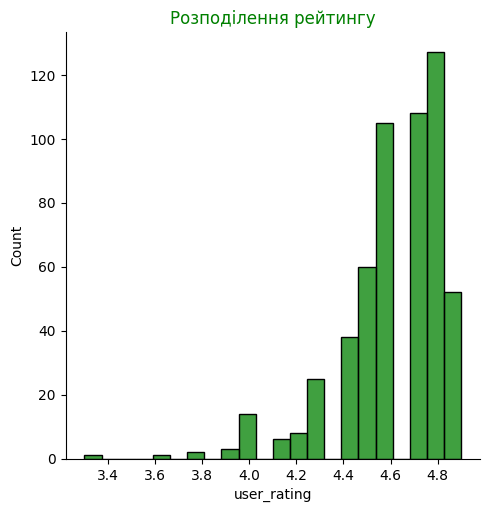

In [922]:
# 1й графік
sns.displot(df['user_rating'], kde=False, color='g')
plt.title('Розподілення рейтингу', color='g')
plt.show()

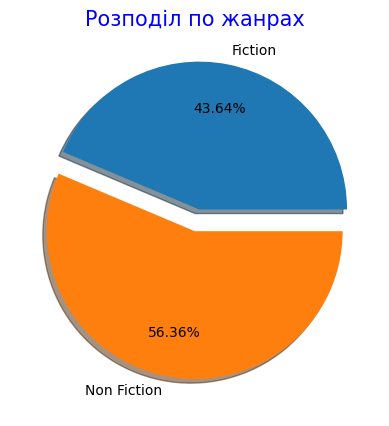

In [923]:
# 2й графік
df_srcl = df.groupby('genre')['name'].agg(['count'])

labels = ['Fiction', 'Non Fiction']
data = [df_srcl.iloc[0]['count'], df_srcl.iloc[1]['count']]
explode = [0.15, 0]
plt.pie(
    data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=0.7,
    labeldistance=1.1,
)
plt.title("Розподіл по жанрах", fontsize=15, color="b", pad=15)
plt.show()

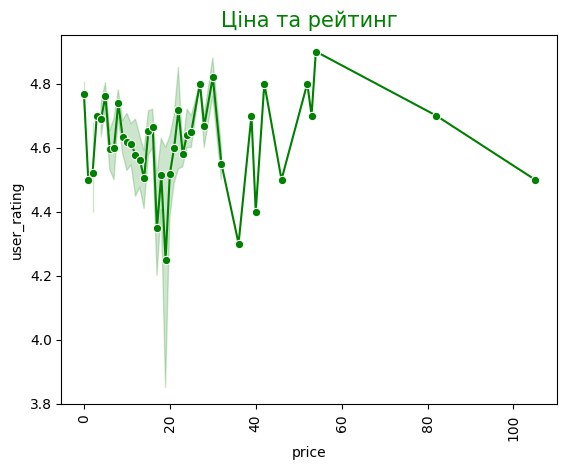

In [924]:
# 3й графік
sns.lineplot(x="price", y='user_rating', data=df, color="g", linestyle="-", marker="o")
plt.title("Ціна та рейтинг", fontsize=15, color="g")
plt.xticks(rotation=90)
plt.show()

       mean
year       
2009  15.40
2010  13.48
2011  15.10
2012  15.30
2013  14.60
2014  14.64
2015  10.42
2016  13.18
2017  11.38
2018  10.52
2019  10.08


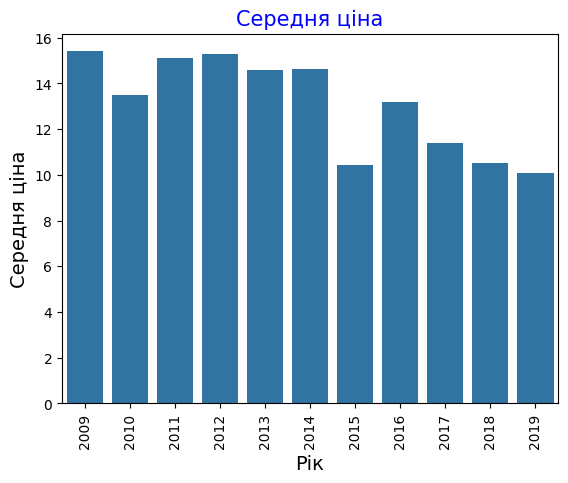

In [925]:
# 4й графік
df_prc = df.groupby('year')['price'].agg(['mean'])
print(df_prc)

sns.barplot(x="year", y="mean", data=df_prc)
plt.title("Середня ціна", fontsize=15, color="b")
plt.xlabel("Рік", fontsize=14)
plt.ylabel("Середня ціна", fontsize=14)
plt.xticks(rotation=90)
plt.show()

         sum
year        
2009  235506
2010  273981
2011  405041
2012  654546
2013  654907
2014  792997
2015  711669
2016  709800
2017  644420
2018  696521
2019  794917


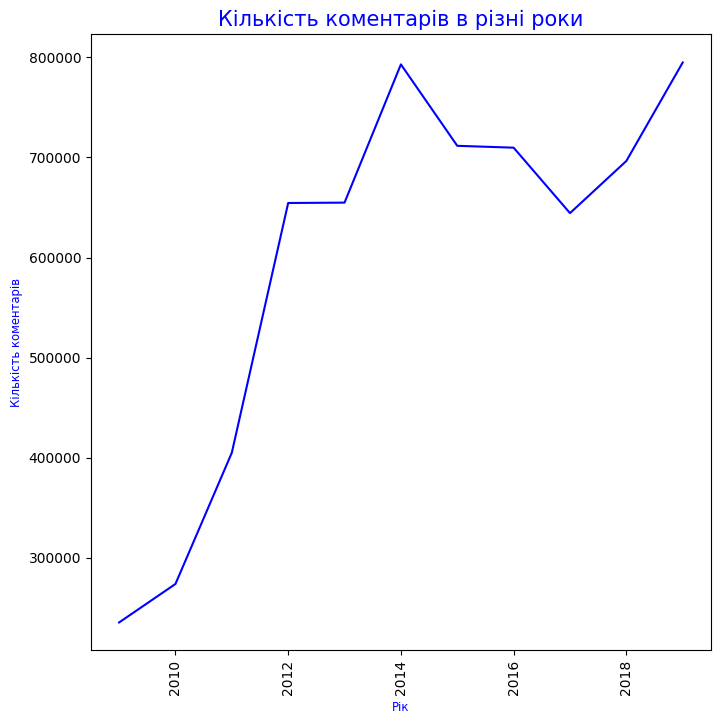

In [929]:
# 5й графік
df_rew = df.groupby('year')['reviews'].agg(['sum'])
print(df_rew)

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(df_rew, color="b")
plt.xticks(rotation=90)
plt.xlabel("Рік", fontsize="small", color="b")
plt.ylabel("Кількість коментарів", fontsize="small", color="b")
plt.title("Кількість коментарів в різні роки", fontsize=15, color="b")
plt.show()